# Raydium Project                                                                              Marcus Johansson

## Raydium Project Snapshot Overview

Raydium is a decentralized finance (DeFi) protocol built on the Solana blockchain. It serves as an automated market maker (AMM) and decentralized exchange (DEX), providing liquidity and trading services for the Solana ecosystem. Raydium's unique feature is its order book integration with Serum DEX, which allows it to tap into shared liquidity across the entire Solana ecosystem. 

The protocol has four types of tokens, these are: 
- **Liquidity Tokens:** These are the Liquidity Providers tokens that represent a user's share in the liquidity pool.
- **Staking Tokens:** These are tokens earned from staking activities, which might be different from LP tokens.
- **Governance Tokens:** These tokens give holders the right to participate in governance decisions of the protocol.
- **RAY Tokens:** These are the native tokens of the Raydium exchange, which can be traded on the exchange and used for various purposes like fee discounts.


## Key features of this Raydium project include:
- Automated Market Making and Token Swaps
- Liquidity calculations to explain how a trader might look at the Raydium protocol 
- Liquidity Provision
- Staking and Initial DEX Offerings (IDOs)
- Yield Farming 
- Potential Attacks on the protocol
- Economic Flowchart

Sources: https://raydium-app.github.io/ 

## Data collection

The data collected in this project are from:
- DeFi Lama, where I have collected the Total Value Locked and the Total Amount Staked on Raydium
- Bybit, where I collected the liquidity metrics and historical prices to calculate the historical volatility
- Dune Analytics, where I have run SQL code and then collected some importat On-Chain metrics. 

In [181]:
# Libraries for the project; 

import ccxt
import numpy as np
import pandas as pd
import pprint
from datetime import datetime, timedelta
import numpy as np
from scipy import stats
from collections import defaultdict
import matplotlib.pyplot as plt
from config_bybit_keys import bybit_key, bybit_secret
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [182]:
#%% API Key set up
exchange = ccxt.bybit({
    'apiKey': bybit_key,
    'secret': bybit_secret,
    'enableRateLimit': True,
})

In [183]:
# This code snippet shows all available ticker symbols on the bybit exchange 

# I have used this function to find the ticker symbol for Radium, which is listed usually as RAY/USDT
# But on Bybit is this ticker symbol mentioned as RAYDIUM/USDT:USDT 

exchange = ccxt.bybit()
markets = exchange.load_markets()

# Print all available market symbols
#for market in markets:
    #print(market)

In [194]:
# Raydium price data direclty from the exchange 

symbol = 'RAYDIUM/USDT:USDT'
def fetch_historical_data(symbol=symbol, timeframe='1d', limit=500):
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, limit=limit)
    return np.array(ohlcv)

prices = fetch_historical_data(symbol)

data = pd.DataFrame(prices, columns=['Timeframe', 'Open', 'High', 'Low', 'Close', 'Volume'])
data['Timeframe'] = pd.to_datetime(data['Timeframe'], unit='ms')
data.set_index('Timeframe', inplace=True)

closing_prices = data['Close']

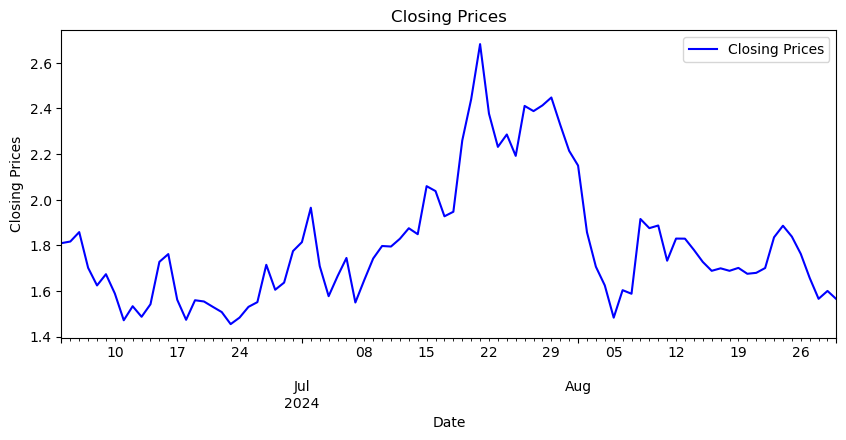

In [195]:
# Plot the closing price
closing_prices.plot(figsize=(10, 4), label='Closing Prices', color='blue')

# Add title and labels
plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Prices')

# Add legend
plt.legend()

# Show plot
plt.show()

## On-Chain analysis with metrics 

### Data Collection:
- I used Dune Analytics to collect 4 on-chain metrics and these are used to vizualise the health of the network form a perspective of the On-Chain protocol.
- After careful consideration of our project requirements and available resources, I have decided to use static screenshots of Dune Analytics dashboards for my data presentation, the analysis benefits significantly from a full historical perspective of metrics such as daily transaction counts. 
- Screenshots allow us to capture and present this long-term trend effectively, which is crucial for understanding the overall performance and growth patterns of the Raydium/USDT protocol.
- I  looked into implementing a live Dune Client integration would require more time and potentially ongoing maintenance and this solution would have worked better on a shorter timeframe compared to the longer timeframe data I would like to show. 


### The Metrics:
**Active Addresses:** An increasing number of active addresses may suggest growing protocol usage and user adoption, which could positively impact Raydium's token price by indicating a healthy and expanding ecosystem.

**Transaction Volume:** Higher transaction volume typically signifies increased demand for utilizing the network, potentially leading to higher token prices due to the protocols's utility and popularity.

**Transaction Count:** A higher transaction count can suggest a vibrant and active protocol, which may reflect positively on s token price by reinforcing confidence in the network's capabilities.

**Whale Activity**: Monitoring whale activity can provide insights into potential market movements and sentiment, influencing trading patterns and potentially impacting Raydium's token price based on large holders' behavior.


### The Analysis: 
**Active Addresses:** Increased daily active addresses, reflects higher user engagement and protocol utilization.

**Transaction Volume:** Increase in transaction volume in 2024, indicates increased trading activity. 

**Transaction Count:** An overall increase in transaction count, showing robust protocol activity and adoption.

**Whale Activity**: Increased whale activity, indicating institutional or major investor interest in Raydium.


### The Results: 
- The results show an indicaton on protocol adoption: Supported by increased daily active addresses, increase in transaction volume and an increase in transaction count as well one spike in whale activity. 


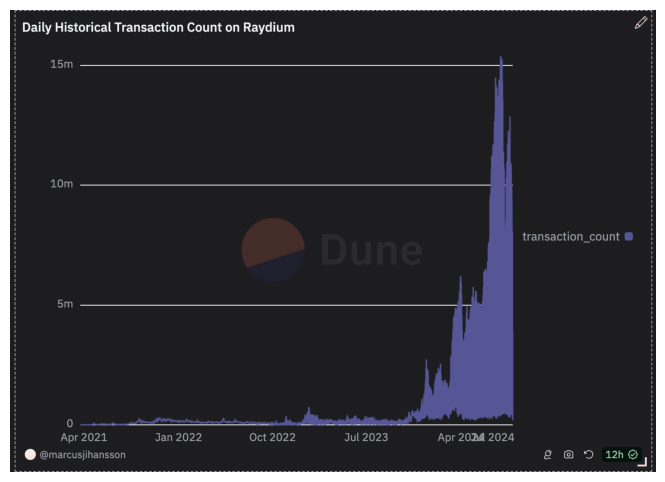

In [172]:
# Daily Transaction Count on the Raydium Protocol

# Path to your screenshot file
image_path = '/Users/marcusjohansson/Desktop/Screenshot 2024-08-30 at 03.37.26.png'

# Load and display the image
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()



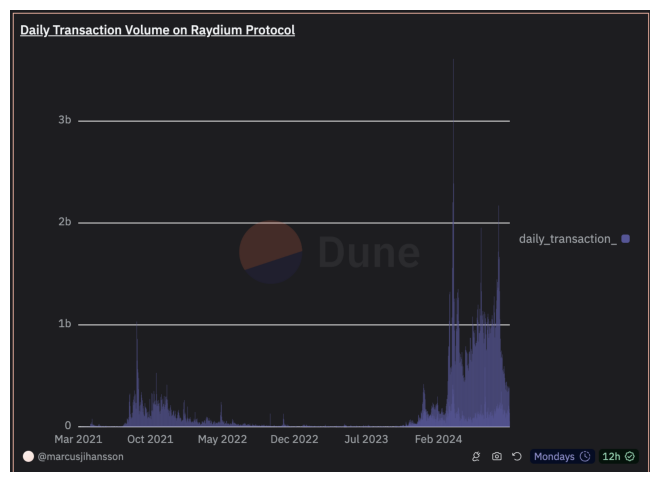

In [170]:
# Daily Transaction Volume on Raydium Protocol

# Path to your screenshot file
image_path = '/var/folders/7m/ytmvmfz93s3c3nbfx8y50kvm0000gn/T/TemporaryItems/NSIRD_screencaptureui_06I8Mr/Screenshot 2024-08-30 at 03.29.47.png'

# Load and display the image
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

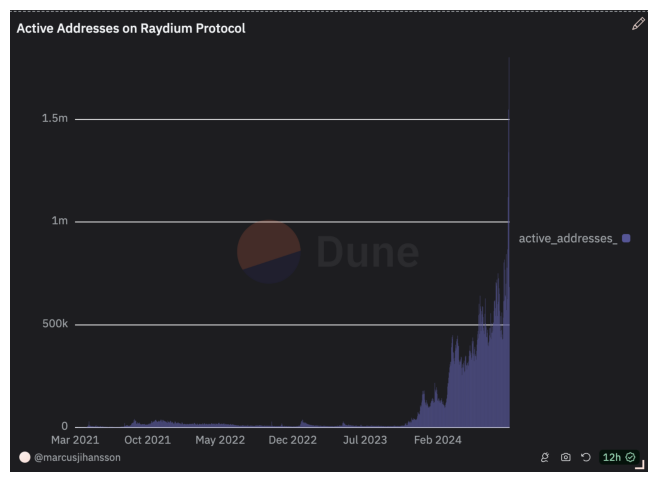

In [176]:
# Active Addresses on Raydium protocol

# Path to your screenshot file
image_path = '/Users/marcusjohansson/Desktop/Screenshot 2024-08-30 at 03.52.42.png'

# Load and display the image
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


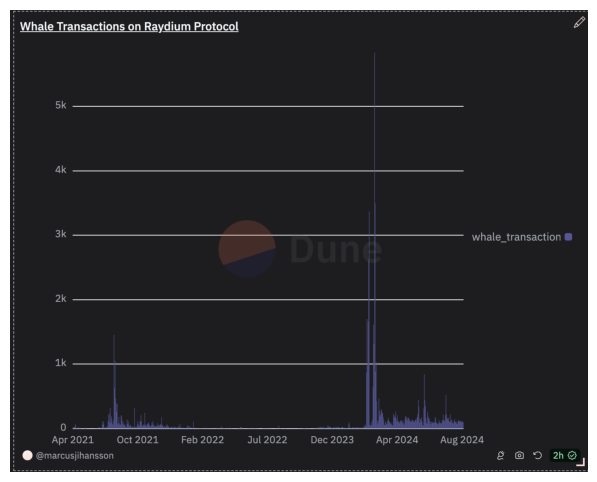

In [175]:
# Whale transactions on Raydium protocol

# Path to your screenshot file
image_path = '/var/folders/7m/ytmvmfz93s3c3nbfx8y50kvm0000gn/T/TemporaryItems/NSIRD_screencaptureui_48kVra/Screenshot 2024-08-30 at 03.46.28.png'

# Load and display the image
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

## Snapshot Overview Total Value Locked

Higher TVL in DeFi protocols on Solana implies strong DeFi activity and increased network utility, potentially bolstering the token price by showcasing the protocols's value within the decentralized finance space. TVL on Raydium, with data from from DeFI-Lama, is measured to $939 million on the date 2024-08-28. 

Total Value Locked (TVL): Significant increases in TVL reflected growing trust in the Raydium protocol

In [137]:
data = pd.read_csv('raydium.csv', usecols=['Date', 'Raydium.3'], parse_dates=['Date'])
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Define the start and end dates
start_date = '2021-03-18'
end_date = '2024-08-28'

# Filter the DataFrame based on the date range
filtered_df = df.loc[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Filter the DataFrame based on the date range
filtered_df['Raydium.3'] = pd.to_numeric(filtered_df['Raydium.3'].astype(str), errors='coerce')

filtered_df.rename(columns={'Raydium.3':'TVL'}, inplace=True)

raydium_tvl = filtered_df


print(raydium_tvl)

           Date           TVL
4    2021-03-18  1.489888e+08
5    2021-03-19  1.532043e+08
6    2021-03-20  1.476909e+08
7    2021-03-21  1.519353e+08
8    2021-03-22  1.529811e+08
...         ...           ...
1213 2024-08-24  9.890431e+08
1214 2024-08-25  1.022513e+09
1215 2024-08-26  1.026893e+09
1216 2024-08-27  1.018312e+09
1217 2024-08-28  9.398287e+08

[1214 rows x 2 columns]


/var/folders/7m/ytmvmfz93s3c3nbfx8y50kvm0000gn/T/ipykernel_60840/2492712232.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('raydium.csv', usecols=['Date', 'Raydium.3'], parse_dates=['Date'])
/var/folders/7m/ytmvmfz93s3c3nbfx8y50kvm0000gn/T/ipykernel_60840/2492712232.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv('raydium.csv', usecols=['Date', 'Raydium.3'], parse_dates=['Date'])
/var/folders/7m/ytmvmfz93s3c3nbfx8y50kvm0000gn/T/ipykernel_60840/2492712232.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Raydium.3']

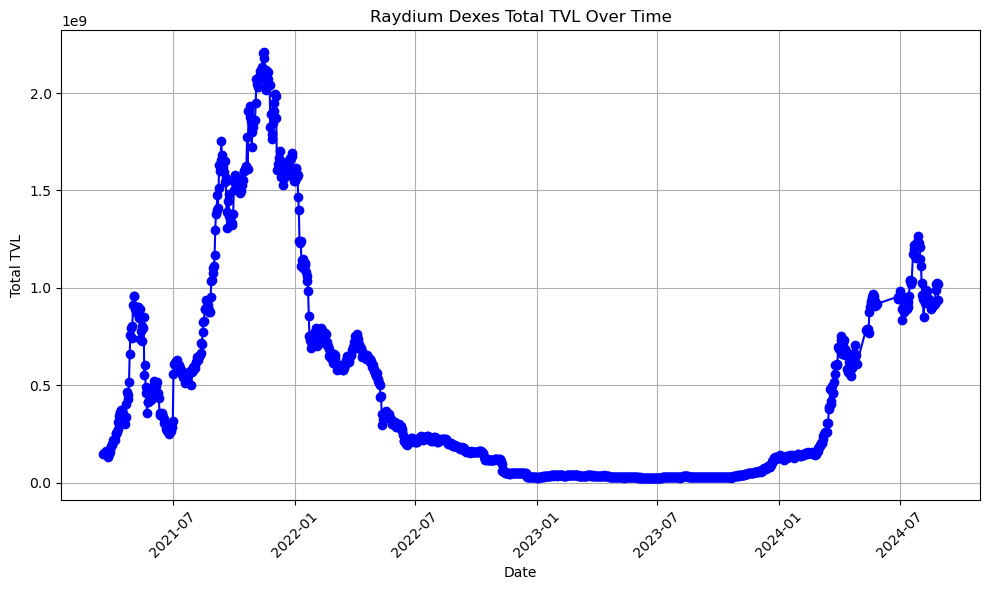

In [143]:
# Plot the TVL 
plt.figure(figsize=(10, 6))
plt.plot(raydium_tvl['Date'], raydium_tvl['TVL'], marker='o', linestyle='-', color='b')
plt.title('Raydium Dexes Total TVL Over Time')
plt.xlabel('Date')
plt.ylabel('Total TVL')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## Historical Volatility betweent the asset and the network

- In this part does the analysis obtain price data from Bybit exchange to calculate the historical volatility of the asset, Raydium, and the network (Solana). Solana is used as the benchmark in this part of the analysis and this part of the analysis also includes a third asset (Helium) to show how the difference between the two assets and the benchmark in terms of volatility behaviours. 

- In this analysis can we see that the assets has higher historical volatility than the network. This shows a stability of the network, as its historical volatility is lower than the two measured assets. This should be the case as the network should be more stabile compared to the assets listed on the network. 

- The general trend shows that the asset Raydium follows the network volatility, while being higher. This is a good sign for the newly listed asset Raydium. Comparatively speaking can we see Helium is having a similar volatility while having higher spikes of volatility compared to both the network as a whole and Raydium.

### Risk measure test
- In the analysis was also a risk measure test, where it tested the daily realized volatility, the Value at Risk and the Expected Shortfall, and the analysis concluded that in the case for a high risk cryptocurrency assets do these assets exhibit much higher volatility compared to traditional financial assets and the values were as followed:

    1) Realized Volatility: 30.9864%
    2) 95% VaR: -11.3034%
    3) 95% Expected Shortfall: -12.8990%

In [196]:
# We obtain the data direclty from the exchange for Raydium

symbol = 'RAYDIUM/USDT:USDT'
def fetch_historical_data(symbol=symbol, timeframe='1d', limit=365):
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, limit=limit)
    return np.array(ohlcv)

prices = fetch_historical_data(symbol)

data = pd.DataFrame(prices, columns=['Timeframe', 'Open', 'High', 'Low', 'Close', 'Volume'])
data['Timeframe'] = pd.to_datetime(data['Timeframe'], unit='ms')
data.set_index('Timeframe', inplace=True)


In [40]:
# We obtain the data direclty from the exchange for Helium

symbol = 'HNT/USDT:USDT'
def fetch_historical_data(symbol=symbol, timeframe='1d', limit=365):
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, limit=limit)
    return np.array(ohlcv)

helium_prices = fetch_historical_data(symbol)

helium = pd.DataFrame(helium_prices, columns=['Timeframe', 'Open', 'High', 'Low', 'Close', 'Volume'])
helium['Timeframe'] = pd.to_datetime(helium['Timeframe'], unit='ms')
helium.set_index('Timeframe', inplace=True)

In [42]:
# We obtain the data direclty from the exchange for Solana

symbol = 'SOL/USDT'
def fetch_historical_data(symbol=symbol, timeframe='1d', limit=365):
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, limit=limit)
    return np.array(ohlcv)

sol_prices = fetch_historical_data(symbol)

sol_data = pd.DataFrame(sol_prices, columns=['Timeframe', 'Open', 'High', 'Low', 'Close', 'Volume'])
sol_data['Timeframe'] = pd.to_datetime(sol_data['Timeframe'], unit='ms')
sol_data.set_index('Timeframe', inplace=True)


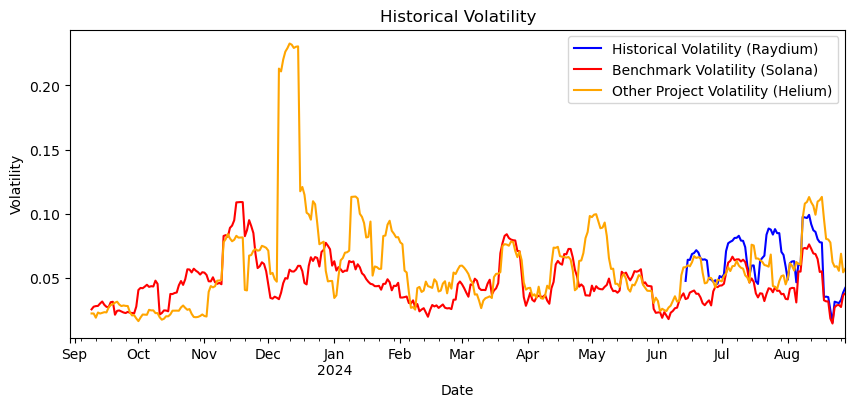

In [43]:
# What is the historical volatility for Raydium a 30-day window?

returns = data['Close'].pct_change()
benchmark_returns = sol_data['Close'].pct_change()
other_project_returns = helium['Close'].pct_change()

#Calculate historical volatility over a 30-day window

historical_volatility = returns.rolling(window=10).std()
benchmark_volatility = benchmark_returns.rolling(window=10).std()
other_project_volatility = other_project_returns.rolling(window=10).std()

# Plot historical volatility
historical_volatility.plot(figsize=(10, 4), label='Historical Volatility (Raydium)', color='blue')

# Plot benchmark volatility
benchmark_volatility.plot(figsize=(10, 4), label='Benchmark Volatility (Solana)', color='red')

# Plot benchmark volatility
other_project_volatility.plot(figsize=(10, 4), label='Other Project Volatility (Helium)', color='orange')

# Add title and labels
plt.title('Historical Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')

# Add legend
plt.legend()

# Show plot
plt.show()


In [50]:
# %% Risk Factor test

def fetch_historical_data(symbol='RAYDIUM/USDT:USDT', timeframe='1d', limit=100):
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, limit=limit)

    return np.array(ohlcv)[:, 4]  # Return closing prices

def calculate_statistical_measures(prices):
    returns = np.diff(np.log(prices))
    
    # Calculate realized volatility
    realized_vol = np.std(returns) * np.sqrt(24) 
    
    # Calculate Value at Risk (VaR)
    var_95 = np.percentile(returns, 5)
    
    # Calculate Expected Shortfall (ES)
    es_95 = np.mean(returns[returns <= var_95])
    
    return realized_vol, var_95, es_95

# Fetch historical data and calculate statistical measures
prices = fetch_historical_data(symbol)
realized_vol, var_95, es_95 = calculate_statistical_measures(prices)

# Convert to percentages
realized_vol_pct = realized_vol * 100
var_95_pct = var_95 * 100
es_95_pct = es_95 * 100

print(f"Realized Volatility: {realized_vol_pct:.4f}%")
print(f"95% VaR: {var_95_pct:.4f}%")
print(f"95% Expected Shortfall: {es_95_pct:.4f}%")

Realized Volatility: 30.9864%
95% VaR: -11.3034%
95% Expected Shortfall: -12.8990%


## Automated Market Maker (AMM):

Raydium uses an AMM model, where liquidity providers (LPs) deposit pairs of tokens into liquidity pools. These pools facilitate trading without the need for a traditional order book. 

### How does an AMM work? 
The price of tokens in the pool is determined by a constant product formula, typically determined by K=Y*X. Where X and Y are the quantities of the two tokens in the pool, and ( K ) is a constant.

- X: Represents the quantity of the first token in the liquidity pool. For example, in a pool containing SOL and RAY, X would be the amount of SOL available.

- Y: Represents the quantity of the second token in the liquidity pool. In this case, Y would be the amount of RAY available.

- K: This is a constant that represents the product of the quantities of the two tokens in the pool, such as 100,000. As trades occur, K remains constant, but the values of X and Y change accordingly. For instance, if a trader buys SOL (X), the amount of SOL decreases while the amount of RAY (Y) increases to maintain the constant product K.


## Token Swaps 
- The user selects the tokens they want to swap and the amount of the input token. 
- Raydium's routing engine finds the best execution path by looking for the pool with the highest liquidity for the given token pair.
- The swap transaction is executed against the liquidity in the selected pool.
- The user receives the output token, minus any applicable fees, which are 0.01% to 1%, depending on the pool. Raydium use these fees to provide liquidity, rewards and to buy back the RAY token

- **Slippage in token swaps is the mechanic where:** The difference between the expected price of a swap and its execution price, for example the difference between the current market price and the expected price for a trade. In trading could this be set at limit orders or at market orders depending on the users slippage tolerance. 


## Charts and calculations
- Down below are calculation and a chart to illustrate how these aspects work in practise 

Sources:https://docs.raydium.io/raydium/protocol/untitled-1 , https://docs.raydium.io/raydium/liquidity-providers/liquidity-providing-faq , https://docs.raydium.io/raydium/traders/swapping/trade-and-swap and https://docs.raydium.io/raydium/traders/swapping 

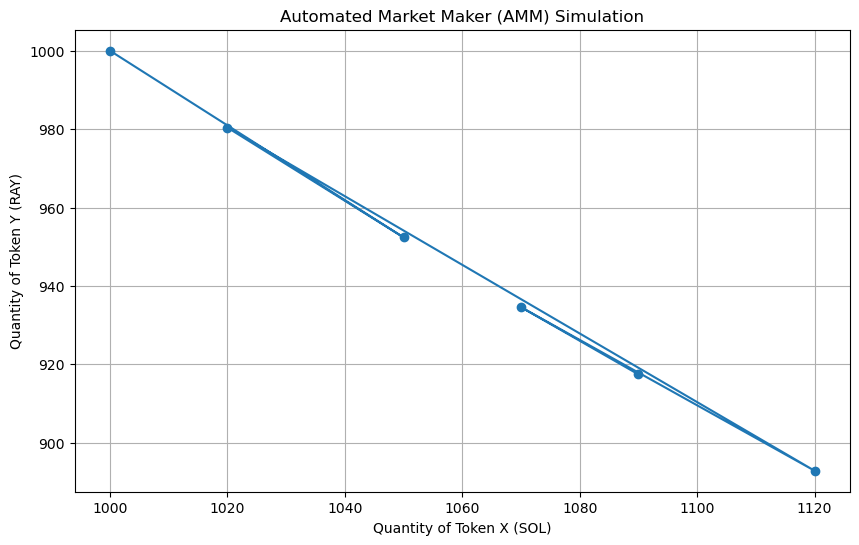

In [52]:
# Initialize the pool
X_initial = 1000  # Initial quantity of token X (e.g., SOL)
Y_initial = 1000  # Initial quantity of token Y (e.g., RAY)
K = X_initial * Y_initial  # Constant product

# Function to simulate a trade
def simulate_trade(X, Y, delta_X):
    """
    Simulate a trade where delta_X tokens of X are added to the pool.
    Returns the new quantities of X and Y.
    """
    new_X = X + delta_X
    new_Y = K / new_X
    return new_X, new_Y

# Simulate a series of trades
trades = [50, -30, 100, -50, 20]  # Example trades (positive for adding X, negative for removing X)
X_values = [X_initial]
Y_values = [Y_initial]

X = X_initial
Y = Y_initial

for delta_X in trades:
    X, Y = simulate_trade(X, Y, delta_X)
    X_values.append(X)
    Y_values.append(Y)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(X_values, Y_values, marker='o')
plt.title('Automated Market Maker (AMM) Simulation')
plt.xlabel('Quantity of Token X (SOL)')
plt.ylabel('Quantity of Token Y (RAY)')
plt.grid(True)
plt.show()

In [ ]:
def calculate_swap_amount(x, y, delta_x):
    """
    Calculate the amount of Token B received for swapping delta_x of Token A.
    
    :param x: Initial reserve of Token A
    :param y: Initial reserve of Token B
    :param delta_x: Amount of Token A to swap
    :return: Amount of Token B received
    """
    y_prime = (x * y) / (x + delta_x)
    delta_y = y - y_prime
    return delta_y

def calculate_slippage(expected_amount, actual_amount):
    """
    Calculate the slippage percentage.
    
    :param expected_amount: Expected amount of Token B
    :param actual_amount: Actual amount of Token B received
    :return: Slippage percentage
    """
    slippage = ((expected_amount - actual_amount) / expected_amount) * 100
    return slippage

# Example usage
initial_reserve_a = 10000  # Initial reserve of Token A
initial_reserve_b = 5000   # Initial reserve of Token B
amount_to_swap = 1000      # Amount of Token A to swap

# Calculate the swap amount
received_b = calculate_swap_amount(initial_reserve_a, initial_reserve_b, amount_to_swap)
print(f"Amount of Token B received: {received_b:.2f}")

# Calculate the expected amount without slippage (ideal case)
expected_b = (initial_reserve_b * amount_to_swap) / initial_reserve_a
print(f"Expected amount of Token B (without slippage): {expected_b:.2f}")

# Calculate slippage
slippage = calculate_slippage(expected_b, received_b)
print(f"Slippage: {slippage:.2f}%")

## Liquidity calculations: Why do we do these calculations?

### An argument from development activity: How can we measure the developent actvivity on AMM protocol? 
- High development activity signifies continuous improvements and enhancements to the protocol, which can enhance the main network´s, eg. Solana´s, value proposition and potentially lead to increased token price on both the main netowrk and the protocol due to positive sentiment and utility. But how can we measure this development activity on this protocol? 
- The token RAY is subject to market fluctuations, making it tradable. This characteristic indicates that RAY can both increase and decrease in value, which is essential for traders looking to take advantage of price movements. So what I have decided to do is to see this AMM protocol´s development activity through the lens of liquidty as an increasing number of trades/ increased liquidity indicates similarly as stated above and in this case could it indicate an bullish sentiment. 
- If the protocol asset is actively traded, it suggests a healthy level of liquidity and interest, allowing traders to enter and exit positions more easily. The ability to trade an asset like RAY efficiently often reflects its usability and demand within the market. 
- Additionally, a tradable asset can provide opportunities for arbitrage and yield farming, further enhancing its attractiveness to traders.
- Overall, the liquidity and trading activity associated with Raydium contribute to its viability as an asset, making it a potentially safe option for traders, provided they are aware of the inherent risks involved in trading cryptocurrencies.


**Development Activity:** Increased development activity, including updates and new partnerships, kept the main netowrk Solana innovative and appealing, thus positively impacting its price in the long term. We could see something similar happening on the Raydium protocol if the liquidty measures are uphold by the AMM structure. 


## Liquidity calculations: The results!

- THe Bid-Ask Spread showed low values, which indicates lower transaction costs and higher liquidity
- The Bid Depth and Ask Depth showd a high value, which indicates a large volume of orders at the best prices, suggesting higher liquidity.
- Order Book Imbalance showd a negative value, which iondicates more sell orders than buy orders, which could suggest downward price pressure.
- Bid and Ask TWAP showed low values, which indicates that the average ask price over the period was low, furthermore could this suggest strong selling interest.
- Bid and Ask Slippage showed low values, which indicates that the actual execution price is close to the expected price. Moreover could this suggest higher liquidity and lower trading costs.
- Kyle's Lambda showed a low value and indicates that large trades have a minimal impact on prices and this may also suggest higher liquidity.
- Amihud's Measure showed a low value and indicates that prices are less sensitive to trading volume and therfore may suggest higher liquidity.

## Liquidity calculations: The Conclusions! 

- The to long did not read version of this analysis, is the following: The analysis indicates that everything seems to be in order according to the AMM strucutre at the time of this analysis 

In [44]:
symbol = 'RAYDIUM/USDT:USDT'

def analyze_liquidity(symbol, depth=10):
    orderbook = exchange.fetch_order_book(symbol)
    bids = orderbook['bids']
    asks = orderbook['asks']

    # 1. Bid-Ask Spread
    spread = asks[0][0] - bids[0][0]
    
    # 2. Market Depth
    bid_depth = sum([bid[1] for bid in bids[:depth]])
    ask_depth = sum([ask[1] for ask in asks[:depth]])
    
    # 3. Order Book Imbalance
    imbalance = (bid_depth - ask_depth) / (bid_depth + ask_depth)
    
    # 4. Approximate TWAP (for a small order)
    def calculate_twap(orders, volume):
        cumulative_volume = 0
        weighted_price = 0
        for price, size in orders:
            if cumulative_volume + size > volume:
                remaining = volume - cumulative_volume
                weighted_price += price * remaining
                break
            weighted_price += price * size
            cumulative_volume += size
        return weighted_price / volume

    sample_volume = 100  # Adjust based on your needs
    bid_twap = calculate_twap(bids, sample_volume)
    ask_twap = calculate_twap(asks, sample_volume)
    
    # 5. Slippage estimation (for sample volume)
    bid_slippage = (bids[0][0] - bid_twap) / bids[0][0]
    ask_slippage = (ask_twap - asks[0][0]) / asks[0][0]

    return {
        'spread': spread,
        'bid_depth': bid_depth,
        'ask_depth': ask_depth,
        'imbalance': imbalance,
        'bid_twap': bid_twap,
        'ask_twap': ask_twap,
        'bid_slippage': bid_slippage,
        'ask_slippage': ask_slippage
    }

liquidity_metrics = analyze_liquidity(symbol)
for metric, value in liquidity_metrics.items():
    print(f"{metric}: {value}")

spread: 0.0021999999999999797
bid_depth: 701.9
ask_depth: 2192.9
imbalance: -0.5150614895675003
bid_twap: 1.5522999999999998
ask_twap: 1.5545
bid_slippage: 1.4304232746571623e-16
ask_slippage: 0.0


In [47]:
#%% Fetch trades data for Advanced metrics 

def fetch_trades(symbol=symbol, limit=100):
    trades = exchange.fetch_trades(symbol, limit=limit)
    return [{
        'price': trade['price'],
        'amount': trade['amount'],
        'timestamp': trade['timestamp'],
        'side': trade['side'] if 'side' in trade else None,
        'cost': trade['cost'] if 'cost' in trade else trade['price'] * trade['amount'],
        'id': trade['id'],
        'order': trade['order'] if 'order' in trade else None,
        'type': trade['type'] if 'type' in trade else None,
        'takerOrMaker': trade['takerOrMaker'] if 'takerOrMaker' in trade else None
    } for trade in trades]
    return trades

# Example usage
trades = fetch_trades(symbol)

#%% Now let's implement Kyle's lambda 

def calculate_kyles_lambda(trades, time_window=3600000):  # default 1 hour in milliseconds
    if len(trades) < 2:
        return None

    times = np.array([trade['timestamp'] for trade in trades])
    prices = np.array([trade['price'] for trade in trades])
    volumes = np.array([trade['amount'] for trade in trades])

    # Calculate log returns
    log_returns = np.diff(np.log(prices))

    # Calculate signed volumes (assuming 'side' is available)
    signed_volumes = np.array([trade['amount'] * (1 if trade.get('side') == 'buy' else -1) for trade in trades[1:]])

    # Calculate time differences
    time_diffs = np.diff(times)

    # Filter data within the time window
    mask = time_diffs <= time_window
    log_returns = log_returns[mask]
    signed_volumes = signed_volumes[mask]
    time_diffs = time_diffs[mask]

    if len(log_returns) < 2:
        return None

    # Calculate Kyle's lambda
    slope, _, _, _, _ = stats.linregress(signed_volumes, log_returns)

    # Annualize lambda (assuming times are in milliseconds)
    lambda_annualized = slope * np.sqrt(365 * 24 * 3600 * 1000 / np.mean(time_diffs))

    return lambda_annualized

# Usage
trades = fetch_trades(symbol, limit=1000)  # Fetch more trades for a better measure
kyles_lambda = calculate_kyles_lambda(trades)
if kyles_lambda is not None:
    print(f"Kyle's lambda (annualized): {kyles_lambda:.8f}")
else:
    print("Not enough data to calculate Kyle's lambda")


#%% Now let's implement Amihud's measure


def calculate_amihud_measure(trades, period_days=30):
    daily_data = defaultdict(lambda: {'price_changes': [], 'volumes': 0})
    
    for i in range(1, len(trades)):
        trade_day = datetime.fromtimestamp(trades[i]['timestamp'] / 1000).date()
        prev_trade_day = datetime.fromtimestamp(trades[i-1]['timestamp'] / 1000).date()
        
        if trade_day == prev_trade_day:
            price_change = abs(trades[i]['price'] - trades[i-1]['price']) / trades[i-1]['price']
            daily_data[trade_day]['price_changes'].append(price_change)
            daily_data[trade_day]['volumes'] += trades[i]['amount']
    
    start_date = min(daily_data.keys())
    end_date = max(daily_data.keys())
    
    amihud_values = []
    current_date = start_date
    while current_date <= end_date:
        if current_date in daily_data:
            avg_price_change = sum(daily_data[current_date]['price_changes']) / len(daily_data[current_date]['price_changes'])
            volume = daily_data[current_date]['volumes']
            if volume > 0:
                amihud_values.append(avg_price_change / volume)
        current_date += timedelta(days=1)
    
    return sum(amihud_values) / len(amihud_values) if amihud_values else None

# Usage
trades = fetch_trades(symbol, limit=1000)  # Fetch more trades for a better measure
amihud_measure = calculate_amihud_measure(trades)
print(f"Amihud's measure: {amihud_measure:.8f}")

Kyle's lambda (annualized): 0.00240361
Amihud's measure: 0.00000001


## Liquidity Provision:

**Users (Liquidity Providers - LPs):** Users can provide liquidity by depositing an equivalent value of two tokens into a liquidity pool. For example, they might deposit 100 USDT worth of Solana and 100 USDT worth of RAY into pool A and B respectively. 

**LP Tokens:** In return for providing liquidity, users receive LP tokens. These LP tokens represent their share of the total liquidity in the pool. This means that the more liquidity the Liquidity Providers provides the protocol the more LP tokens they recieve. These LP token are shares of the protocol, just like shares in a large publicly traded company. I am using a large publicly traded company in this example as they have a higher levle of liquidity compared to a smaller publicly traded company and in the case for private company do they not have the dynamic market to trade the tokens like the crypto market have. 

### Trading Fees and Fee Distribution:

- Whenever a trade occurs in the pool, a small fee is charged and this fee is distributed among all LPs in proportion to their share of the pool. 
- Reasonable protocol fees can indicate a balanced supply-demand ratio and efficient protocol operation, which may positively impact Raydium's token price by attracting more users and investors.
- Equitable token distribution among a large number of holders also contributed positively to price stability and growth, as it reduced risks of large dumps by major holders.

Sources: https://docs.raydium.io/raydium/liquidity-providers/liquidity-providing-faq and https://docs.raydium.io/raydium/protocol/protocol-fees 

In [83]:
class LiquidityPool:
    def __init__(self, token_a_supply, token_b_supply, total_lp_tokens, fee_rate=0.003):
        self.token_a_supply = token_a_supply
        self.token_b_supply = token_b_supply
        self.total_lp_tokens = total_lp_tokens
        self.lp_holders = {}
        self.total_fees_collected = 0
        self.fee_rate = fee_rate  # Trading fee rate (e.g., 0.3%)

    def provide_liquidity(self, user, token_a_amount, token_b_amount):
        # Calculate the LP tokens to be minted
        lp_tokens_minted = (token_a_amount + token_b_amount) / (self.token_a_supply + self.token_b_supply) * self.total_lp_tokens
        self.token_a_supply += token_a_amount
        self.token_b_supply += token_b_amount
        self.total_lp_tokens += lp_tokens_minted

        # Update user's LP token balance
        if user in self.lp_holders:
            self.lp_holders[user] += lp_tokens_minted
        else:
            self.lp_holders[user] = lp_tokens_minted

        return lp_tokens_minted

    def trade(self, token_a_amount, token_b_amount):
        # Simulate a trade and collect fees
        fee_a = token_a_amount * self.fee_rate
        fee_b = token_b_amount * self.fee_rate
        self.total_fees_collected += fee_a + fee_b

        # Update the pool's token supply
        self.token_a_supply += token_a_amount - fee_a
        self.token_b_supply += token_b_amount - fee_b

    def calculate_fee_share(self, user):
        user_lp_tokens = self.lp_holders.get(user, 0)
        user_share = user_lp_tokens / self.total_lp_tokens
        user_fee_share = user_share * self.total_fees_collected
        return user_fee_share

# Example usage
pool = LiquidityPool(token_a_supply=100000, token_b_supply=100000, total_lp_tokens=1000)

# User provides liquidity
user = "Alice"
token_a_amount = 1000
token_b_amount = 1000
lp_tokens = pool.provide_liquidity(user, token_a_amount, token_b_amount)
print(f"{user} received {lp_tokens:.2f} LP tokens")

# Simulate some trades
pool.trade(token_a_amount=1000, token_b_amount=0)
pool.trade(token_a_amount=200, token_b_amount=100)
pool.trade(token_a_amount=400, token_b_amount=300)
pool.trade(token_a_amount=200, token_b_amount=500)
pool.trade(token_a_amount=100, token_b_amount=900)

# Calculate user's share of trading fees
user_fee_share = pool.calculate_fee_share(user)
print(f"{user} earns {user_fee_share:.2f} RAY tokens from trading fees")

Alice received 10.00 LP tokens
Alice earns 0.11 RAY tokens from trading fees


## Staking

- Users can deposit two forms of tokens on the Raydium protocol: these two are the protocols native token RAY and the LP token, and users can deposit these two tokens into the two different staking pools. Both to gain rewards in form of additional RAY tokens, in form of fee discounts, or in form of additional LP tokens. 
- The rewards are distributed based on the proportion of the user's stake to the total pool, in each of the two tokens and the reward rate is typically expressed in APY (Annual Percentage Yield) 
- The APR given on the Raydium webiste is 5.83% and in APY terms is this 5.99%. 
- Something to note is that the staking rewards are often subject to a vesting period to encourage long-term holding


### Can we draw further conclusions: 

- Positive staking metrics like high staking participation and a growing number of validators can indicate a strong network and community support, potentially boosting investor confidence in Raydium and positively influencing the token price.
- Growth in staking metrics indicated greater confidence in the network stability, correlating positively with price as more investors locked their RAY for staking rewards.


### Initial Dex Offerings (IDOs):

- Raydium's AcceleRaytor is an initiative that serves as a launchpad for new projects to raise capital and drive initial liquidity on the Solana ecosystem. 
- Raydium analyzes and vets potential projects to be featured on the AcceleRaytor launchpad. When a new IDO is announced, RAY token holders can participate by staking their RAY tokens.
- The amount of RAY staked determines the allocation of the new project's tokens that the user will receive.
- There are usually minimum staking requirements and allocation limits set for each IDO.


Sources: https://raydium.io/staking/, https://docs.raydium.io/raydium/ray_token/acceleraytor and https://www.binance.com/en/research/projects/raydium 

In [149]:
# We can use this function to calculate the APY based on the APR given on Raydium website

def apr_to_apy(apr, n):
    apy = (1 + apr / n) ** n - 1
    return apy

# Example: 
apr = 0.0583  
n = 12  

apy = apr_to_apy(apr, n)
print(f"APY: {apy:.2%}")

APY: 5.99%


In [150]:
# Define the staking function
def calculate_staking_rewards(initial_stake, apy, duration_days):
    """
    Calculate the staking rewards for a given initial stake, APY, and duration.
    
    :param initial_stake: Initial amount of RAY tokens staked
    :param apy: Annual percentage yield (in %)
    :param duration_days: Duration of staking in days
    :return: Total rewards earned
    """
    # Convert APY to a daily rate
    daily_rate = apy / 100 / 365
    
    # Calculate the total rewards
    total_rewards = initial_stake * daily_rate * duration_days
    
    return total_rewards

# Example usage
initial_stake = 1000  # Initial RAY tokens staked
apy = apy # Annual percentage yield
duration_days = 365  # Duration of staking in days

# Calculate the rewards
rewards = calculate_staking_rewards(initial_stake, apy, duration_days)
print(f"Total rewards earned: {rewards} RAY tokens")

Total rewards earned: 0.5988333061760142 RAY tokens


In [147]:
data = pd.read_csv('raydium.csv', usecols=['Date', 'Raydium'], parse_dates=['Date'])

df = pd.DataFrame(data)

raydium_staking = df.dropna()


print(raydium_staking)

           Date          Raydium
856  2023-07-19   5729440.795623
857  2023-07-20   6635689.933249
858  2023-07-21    6881041.30792
859  2023-07-22   5911674.255283
860  2023-07-23   5906052.137383
...         ...              ...
1213 2024-08-24  58828099.912276
1214 2024-08-25   59277356.00446
1215 2024-08-26  59890353.135237
1216 2024-08-27  57914836.583954
1217 2024-08-28  54035787.102305

[362 rows x 2 columns]


/var/folders/7m/ytmvmfz93s3c3nbfx8y50kvm0000gn/T/ipykernel_60840/398082925.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('raydium.csv', usecols=['Date', 'Raydium'], parse_dates=['Date'])
/var/folders/7m/ytmvmfz93s3c3nbfx8y50kvm0000gn/T/ipykernel_60840/398082925.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv('raydium.csv', usecols=['Date', 'Raydium'], parse_dates=['Date'])


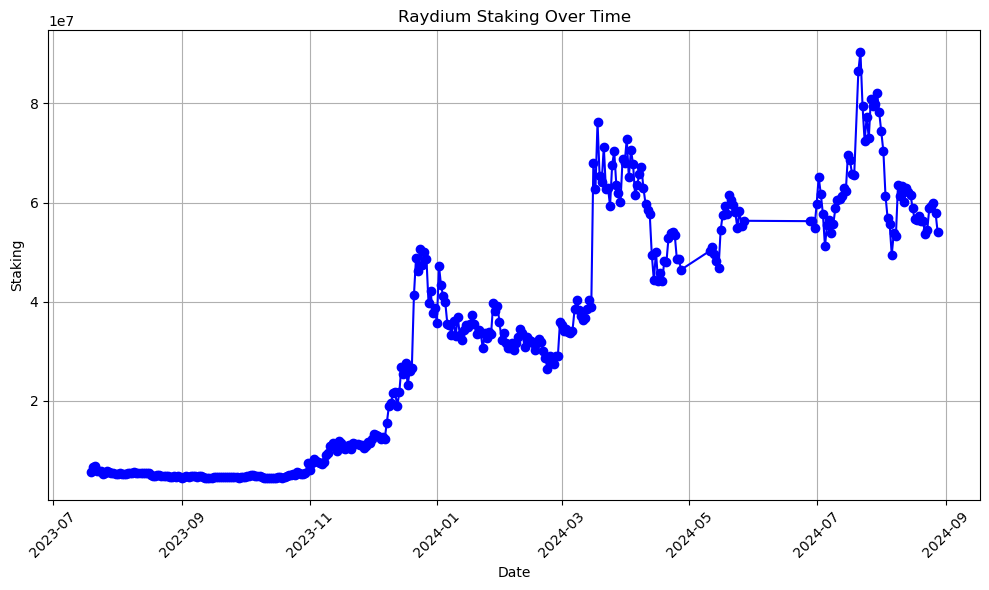

In [180]:
# Plot the Staking 
plt.figure(figsize=(10, 6))
plt.plot(raydium_staking['Date'], raydium_staking['Raydium'], marker='o', linestyle='-', color='b')
plt.title('Raydium Staking Over Time')
plt.xlabel('Date')
plt.ylabel('Staking')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [89]:
def calculate_fee_discount(ray_staked):
    base_fee = 0.003  # 0.3% base fee
    max_discount = 0.50  # 50% maximum discount
    
    # Discount tiers
    tiers = [
        (1_000_000, 0.50),  # 50% discount for 1,000,000+ RAY staked
        (100_000, 0.40),    # 40% discount for 100,000+ RAY staked
        (10_000, 0.30),     # 30% discount for 10,000+ RAY staked
        (1_000, 0.20),      # 20% discount for 1,000+ RAY staked
        (100, 0.10)         # 10% discount for 100+ RAY staked
    ]
    
    for threshold, discount in tiers:
        if ray_staked >= threshold:
            applied_discount = min(discount, max_discount)
            discounted_fee = base_fee * (1 - applied_discount)
            return discounted_fee
    
    return base_fee  # No discount applied

# Example usage
staked_amounts = [100, 1000, 4000, 10000, 100000, 1000000]

for amount in staked_amounts:
    fee = calculate_fee_discount(amount)
    print(f"Staked RAY: {amount:,}, Trading Fee: {fee:.6f} ({fee * 100:.4f}%)")

Staked RAY: 100, Trading Fee: 0.002700 (0.2700%)
Staked RAY: 1,000, Trading Fee: 0.002400 (0.2400%)
Staked RAY: 4,000, Trading Fee: 0.002400 (0.2400%)
Staked RAY: 10,000, Trading Fee: 0.002100 (0.2100%)
Staked RAY: 100,000, Trading Fee: 0.001800 (0.1800%)
Staked RAY: 1,000,000, Trading Fee: 0.001500 (0.1500%)


In [198]:
# Define the staking function for LP tokens
def calculate_lp_staking_rewards(initial_stake, apy, duration_days):
    """
    Calculate the staking rewards for a given initial stake of LP tokens, APY, and duration.
    
    :param initial_stake: Initial amount of LP tokens staked
    :param apy: Annual percentage yield (in %)
    :param duration_days: Duration of staking in days
    :return: Total rewards earned
    """
    # Convert APY to a daily rate
    daily_rate = apy / 100 / 365
    
    # Calculate the total rewards
    total_rewards = initial_stake * daily_rate * duration_days
    
    return total_rewards

# Example usage
initial_stake = 10  # Initial LP tokens staked, based on the previous example 
apy = apy
duration_days = 365  # Duration of staking in days

# Calculate the rewards
rewards = calculate_lp_staking_rewards(initial_stake, apy, duration_days)
print(f"Total rewards earned: {rewards} LP tokens")

Total rewards earned: 0.005988333061760142 LP tokens


In [197]:
import random

class IDO:
    def __init__(self, total_tokens, token_price, fee_percentage):
        self.total_tokens = total_tokens
        self.token_price = token_price
        self.fee_percentage = fee_percentage

class Protocol:
    def __init__(self, name):
        self.name = name
        self.total_fees = 0

class User:
    def __init__(self, name, staked_amount):
        self.name = name
        self.staked_amount = staked_amount
        self.tokens = 0
        self.profit = 0

def run_ido(protocol, ido, users):
    total_staked = sum(user.staked_amount for user in users)
    
    # Distribute tokens to users based on their stake
    for user in users:
        allocation = (user.staked_amount / total_staked) * ido.total_tokens
        user.tokens += allocation
    
    # Calculate protocol fees
    raised_amount = ido.total_tokens * ido.token_price
    protocol_fee = raised_amount * (ido.fee_percentage / 100)
    protocol.total_fees += protocol_fee
    
    print(f"{protocol.name} earned {protocol_fee:.2f} in fees")

def simulate_market(users, initial_price, simulations):
    for _ in range(simulations):
        # Simulate price movement (simplified)
        price_change = random.uniform(-0.1, 0.2)  # -10% to +20% change
        new_price = initial_price * (1 + price_change)
        
        for user in users:
            value_change = user.tokens * (new_price - initial_price)
            user.profit += value_change
    
    for user in users:
        print(f"{user.name} profit: {user.profit:.2f}")

# Set up the simulation
raydium = Protocol("Raydium")
example_ido = IDO(total_tokens=1000000, token_price=0.01, fee_percentage=2)
users = [
    User("Alice", 1000),
    User("Bob", 500),
    User("Charlie", 2000)
]

# Run the IDO
run_ido(raydium, example_ido, users)

# Simulate market movement
simulate_market(users, example_ido.token_price, 30)  # Simulate 30 days

print(f"Total protocol fees: {raydium.total_fees:.2f}")

Raydium earned 200.00 in fees
Alice profit: 4695.41
Bob profit: 2347.71
Charlie profit: 9390.83
Total protocol fees: 200.00


## Yield Farming:

- Provide liquidity to a pool on Raydium by depositing an equal value of two tokens. You will receive LP tokens representing your share of the pool.
Stake your LP tokens in the corresponding farm on Raydium. This allows you to earn additional rewards, typically in the form of RAY tokens.
- Users can for example harvest the rewards periodically and re-stake them to compound earnings, or unstake your LP tokens whenever you want to withdraw your liquidity from the pool.

### Something to note of intereest: 
- Unlike many AMMs, Raydium integrates with Serum, a decentralized order book-based exchange on Solana. This allows Raydium to access Serum's order book liquidity, providing deeper liquidity and better price discovery.

### Charts and sources: 
Sources: https://www.binance.com/en/research/projects/raydium and https://wiki.rugdoc.io/docs/yield-farming-of-raydium-exchange/ 

- Down below is an example to illustrate how this yield farming actvities work

In [200]:
class LiquidityPool:
    def __init__(self, token_a_supply, token_b_supply, total_lp_tokens, fee_rate=0.003, ray_conversion_rate=0.1):
        self.token_a_supply = token_a_supply
        self.token_b_supply = token_b_supply
        self.total_lp_tokens = total_lp_tokens
        self.lp_holders = {}
        self.total_fees_collected = 0
        self.fee_rate = fee_rate  # Trading fee rate (e.g., 0.3%)
        self.ray_conversion_rate = ray_conversion_rate  # Conversion rate to RAY tokens
        self.staked_lp_tokens = {}
        self.staked_ray_tokens = {}
        self.yield_farming_rewards = 0

    def provide_liquidity(self, user, token_a_amount, token_b_amount):
        # Calculate the LP tokens to be minted
        lp_tokens_minted = (token_a_amount + token_b_amount) / (self.token_a_supply + self.token_b_supply) * self.total_lp_tokens
        self.token_a_supply += token_a_amount
        self.token_b_supply += token_b_amount
        self.total_lp_tokens += lp_tokens_minted

        # Update user's LP token balance
        if user in self.lp_holders:
            self.lp_holders[user] += lp_tokens_minted
        else:
            self.lp_holders[user] = lp_tokens_minted

        return lp_tokens_minted

    def trade(self, token_a_amount, token_b_amount):
        # Simulate a trade and collect fees
        fee_a = token_a_amount * self.fee_rate
        fee_b = token_b_amount * self.fee_rate
        self.total_fees_collected += fee_a + fee_b

        # Update the pool's token supply
        self.token_a_supply += token_a_amount - fee_a
        self.token_b_supply += token_b_amount - fee_b

    def calculate_fee_share(self, user):
        user_lp_tokens = self.lp_holders.get(user, 0)
        user_share = user_lp_tokens / self.total_lp_tokens
        user_fee_share = user_share * self.total_fees_collected

        # Convert fee share to RAY tokens
        user_ray_tokens = user_fee_share * self.ray_conversion_rate
        return user_ray_tokens

    def stake_lp_tokens(self, user, lp_tokens):
        if user in self.lp_holders and self.lp_holders[user] >= lp_tokens:
            self.lp_holders[user] -= lp_tokens
            if user in self.staked_lp_tokens:
                self.staked_lp_tokens[user] += lp_tokens
            else:
                self.staked_lp_tokens[user] = lp_tokens
            return True
        return False

    def calculate_yield_farming_rewards(self, user):
        staked_tokens = self.staked_lp_tokens.get(user, 0)
        # For simplicity, let's assume a fixed reward rate
        reward_rate = 0.05  # 5% reward rate
        rewards = staked_tokens * reward_rate
        self.yield_farming_rewards += rewards
        return rewards

    def stake_ray_tokens(self, user, ray_tokens):
        if user in self.staked_ray_tokens:
            self.staked_ray_tokens[user] += ray_tokens
        else:
            self.staked_ray_tokens[user] = ray_tokens
        return True

    def calculate_staking_rewards(self, user):
        staked_ray = self.staked_ray_tokens.get(user, 0)
        # For simplicity, let's assume a fixed reward rate
        reward_rate = apy
        rewards = staked_ray * reward_rate
        return rewards

class OrderBook:
    def __init__(self):
        self.orders = []

    def add_order(self, price, amount):
        self.orders.append((price, amount))

    def get_best_price(self):
        if not self.orders:
            return None
        return min(self.orders, key=lambda x: x[0])

# Example usage
pool = LiquidityPool(token_a_supply=100000, token_b_supply=100000, total_lp_tokens=1000)
order_book = OrderBook()

# User provides liquidity
user = "Alice"
token_a_amount = 10000
token_b_amount = 10000
lp_tokens = pool.provide_liquidity(user, token_a_amount, token_b_amount)
print(f"{user} received {lp_tokens:.2f} LP tokens")

# Simulate some trades
pool.trade(token_a_amount=5000, token_b_amount=5000)
pool.trade(token_a_amount=3000, token_b_amount=3000)
pool.trade(token_a_amount=2000, token_b_amount=2000)

# Calculate user's share of trading fees in RAY tokens
user_ray_tokens = pool.calculate_fee_share(user)
print(f"{user} earns {user_ray_tokens:.2f} RAY tokens from trading fees")

# User stakes LP tokens for yield farming
staked = pool.stake_lp_tokens(user, lp_tokens / 2)
if staked:
    print(f"{user} staked {lp_tokens / 2:.2f} LP tokens for yield farming")

# Calculate yield farming rewards
rewards = pool.calculate_yield_farming_rewards(user)
print(f"{user} earns {rewards:.2f} RAY tokens from yield farming")

# User stakes RAY tokens directly
staked_ray = pool.stake_ray_tokens(user, user_ray_tokens)
if staked_ray:
    print(f"{user} staked {user_ray_tokens:.2f} RAY tokens")

# Calculate staking rewards
staking_rewards = pool.calculate_staking_rewards(user)
print(f"{user} earns {staking_rewards:.2f} RAY tokens from staking RAY tokens")

# Add orders to the order book
order_book.add_order(price=1.01, amount=1000)
order_book.add_order(price=1.02, amount=2000)

# Get the best price from the order book
best_price = order_book.get_best_price()
print(f"Best price in the order book: {best_price[0]:.2f} for {best_price[1]:.2f} tokens")

Alice received 100.00 LP tokens
Alice earns 0.55 RAY tokens from trading fees
Alice staked 50.00 LP tokens for yield farming
Alice earns 2.50 RAY tokens from yield farming
Alice staked 0.55 RAY tokens
Alice earns 0.03 RAY tokens from staking RAY tokens
Best price in the order book: 1.01 for 1000.00 tokens


## Governance and attacks on the protocol

### Smart Contract Exploits:

**Vulnerability:** As with any DeFi project, Raydium is susceptible to smart contract vulnerabilities. Bugs or exploits in the smart contract code could lead to loss of funds or manipulation of the protocol.

**Mitigation:** Regular audits by reputable security firms and a bug bounty program can help identify and fix vulnerabilities before they are exploited.
Liquidity Pool Attacks:

### Hacking and other exploits:

**Vulnerability:** Attackers may target Raydium's infrastructure or user wallets through phishing, malware, or other hacking techniques. 

**Mitigation:** Users should always practice good security hygiene and use reputable wallets.

### Front Running:

**Vulnerability:** Impermanent loss and front-running attacks can affect liquidity providers. Malicious actors could manipulate the price of assets in the liquidity pool to their advantage.

**Mitigation:** Implementing anti-front-running measures and educating users about the risks of impermanent loss can help mitigate these issues.

### Inherently problematic:

**Impermanent loss:** When the relative value of the two tokens in a pool changes significantly, liquidity providers can suffer impermanent loss. This is a risk inherent to providing liquidity in AMMs.

### Rug pulls and scams on Yield Farms: 
**Vulnerability:** Yield farming can attract scammers who create fake projects or farms to lure users into providing liquidity. 

**Mitigation:** Always research projects thoroughly before participating.

### Governance attacks and regulatory risks:

**Vulnerability:** If a malicious actor accumulates a significant amount of RAY tokens, they could potentially influence governance decisions to their benefit, potentially harming the protocol.

**Mitigation:** Implementing a time-lock mechanism for governance proposals and requiring a quorum for votes can help prevent malicious takeovers.

**Regulatory risks:** Changes in cryptocurrency regulations could impact Raydium's operations or the value of its RAY token.

In [61]:
def calculate_voting_power(ray_balance, total_ray_supply):
    voting_power = ray_balance / total_ray_supply
    return voting_power

# Example usage
user_balance = 10000  # User's RAY token balance
total_supply = 100000000  # Total supply of RAY tokens
voting_power = calculate_voting_power(user_balance, total_supply)
print(f"Voting power: {voting_power * 100:.6f}%")

Voting power: 0.010000%


# Economic Flowchart of the Ecosystem


1. **Liquidity Providers (LP):**
   - Provide liquidity to Liquidity Pools.
   - Earn RAY tokens from the Liquidity Pools.

2. **Traders (T):**
   - Trade on Raydium AMM.
   - Pay fees in RAY tokens.

3. **Stakers (S):**
   - Stake RAY tokens in Staking Pools.
   - Earn staking rewards.

4. **Liquidity Pools (LPools):**
   - Interact with Raydium AMM.
   - Provide liquidity and earn RAY tokens.

5. **Raydium AMM (AMM):**
   - Facilitates trading.
   - Interacts with both Liquidity Pools and Staking Pools.
   - Provides fee discounts and rebates.

6. **Staking Pools (SPools):**
   - Interact with Raydium AMM.
   - Provide staking rewards.
   - Participate in yield farming.

7. **Governance (G):**
   - Influences fee discounts and rebates.
   - Interacts with yield farming.

8. **Fee Discounts & Rebates (FD):**
   - Provide fee discounts and rebates to traders.
   - Interact with yield farming.

9. **Yield Farming (YF):**
   - Provides additional rewards to stakers.

This flowchart visually represents the interactions and flow of activities between different participants and components within the Raydium protocol.

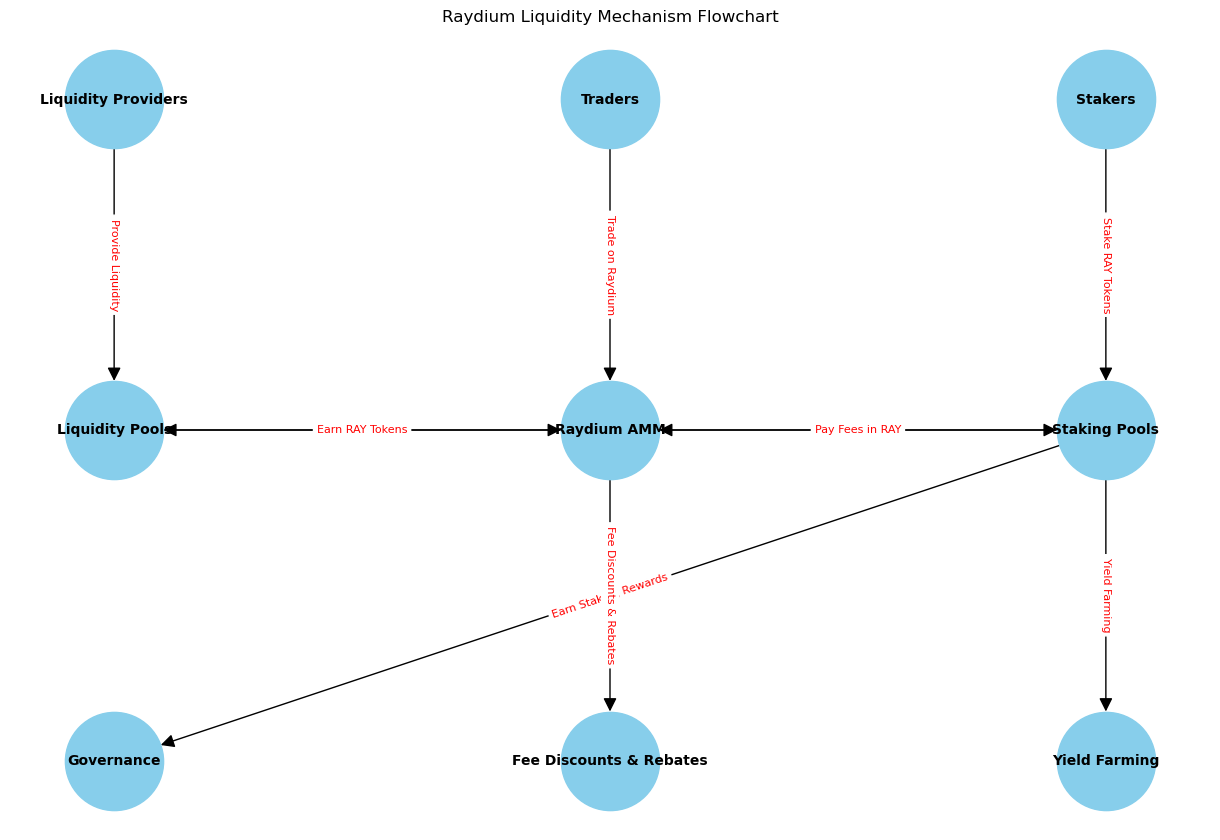

In [201]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes with positions
positions = {
    'Liquidity Providers': (0, 2),
    'Traders': (2, 2),
    'Stakers': (4, 2),
    'Liquidity Pools': (0, 0),
    'Raydium AMM': (2, 0),
    'Staking Pools': (4, 0),
    'Governance': (0, -2),
    'Fee Discounts & Rebates': (2, -2),
    'Yield Farming': (4, -2)
}

G.add_nodes_from(positions.keys())

# Add edges with labels
edges = [
    ('Liquidity Providers', 'Liquidity Pools', 'Provide Liquidity'),
    ('Traders', 'Raydium AMM', 'Trade on Raydium'),
    ('Stakers', 'Staking Pools', 'Stake RAY Tokens'),
    ('Liquidity Pools', 'Raydium AMM', 'Earn RAY Tokens'),
    ('Raydium AMM', 'Staking Pools', 'Pay Fees in RAY'),
    ('Staking Pools', 'Governance', 'Earn Staking Rewards'),
    ('Raydium AMM', 'Fee Discounts & Rebates', 'Fee Discounts & Rebates'),
    ('Staking Pools', 'Yield Farming', 'Yield Farming')
]

# Add bidirectional edges
bidirectional_edges = [
    ('Liquidity Pools', 'Raydium AMM'),
    ('Raydium AMM', 'Staking Pools')
]

for edge in edges:
    G.add_edge(edge[0], edge[1], label=edge[2])

for edge in bidirectional_edges:
    G.add_edge(edge[0], edge[1])
    G.add_edge(edge[1], edge[0])

# Draw the graph
plt.figure(figsize=(12, 8))
pos = positions
nx.draw(G, pos, with_labels=True, node_size=5000, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=20)

# Draw edge labels
edge_labels = {(edge[0], edge[1]): edge[2] for edge in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)

plt.title('Raydium Liquidity Mechanism Flowchart')
plt.show()